<a href="https://colab.research.google.com/github/Tarun-747/Data-Narrative/blob/main/Data_Narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1** From the given dataset, if a player scores a higher percentage of First Serve Points than the opponent, what is the probability that he won that game? Also, give a pie chart of the players who scored more % of first serve points categorized by winner vs loser.

The probabilty that the player who sores more no. of first serve point won is:0.59


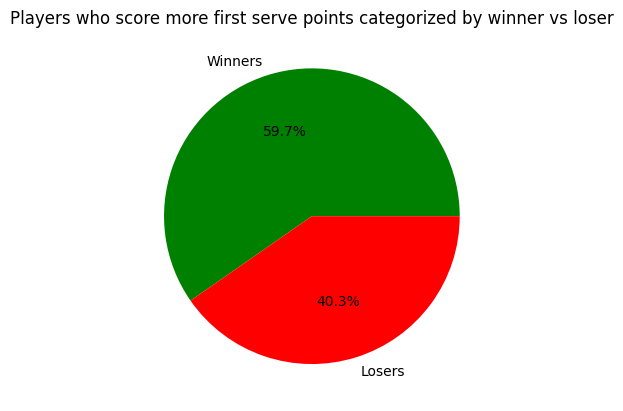

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

matches_df = pd.read_csv("/content/AusOpen-men-2013.csv")

import pandas as pd
import matplotlib.pyplot as plt


highest_serve_1=matches_df[matches_df["FSP.1"]>matches_df["FSP.2"]]
highest_serve_2=matches_df[matches_df["FSP.2"]>matches_df["FSP.1"]]
highest_serve_won_1=highest_serve_1[highest_serve_1["Result"]==1]
highest_serve_won_2=highest_serve_2[highest_serve_2["Result"]==0]
n1=len(highest_serve_won_1);n2=len(highest_serve_won_2);n=len(matches_df)
probab=(n1+n2)/n
print(f"The probabilty that the player who sores more no. of first serve point won is:{probab:.2f}")


highest_serve_lost_1=highest_serve_1[highest_serve_1["Result"]==0]
highest_serve_lost_2=highest_serve_2[highest_serve_2["Result"]==1]
losers_df=pd.concat([highest_serve_lost_1, highest_serve_lost_2])
winners_df=pd.concat([highest_serve_won_1, highest_serve_won_2])

data=[len(winners_df),len(losers_df)]
color=["green","red"]
labels=["Winners","Losers"]
plt.pie(data, labels=labels, colors=color, autopct='%1.1f%%')
plt.title("Players who score more first serve points categorized by winner vs loser")
plt.show()


**Q2** If a player can score an ace won, then there is a chance that there is less competition for that player. But with increasing the ground level, the competition increases. Then, find the avg ace won in each round for the winning players and compare those using a bar graph. (from dataset AusOpen-women-2013)

Avg ace points scored by winners in 1 round is 3.8125
Avg ace points scored by winners in 2 round is 3.15625
Avg ace points scored by winners in 3 round is 3.0625
Avg ace points scored by winners in 4 round is 2.75
Avg ace points scored by winners in 5 round is 1.0
Avg ace points scored by winners in 6 round is 2.0
Avg ace points scored by winners in 7 round is 2.0


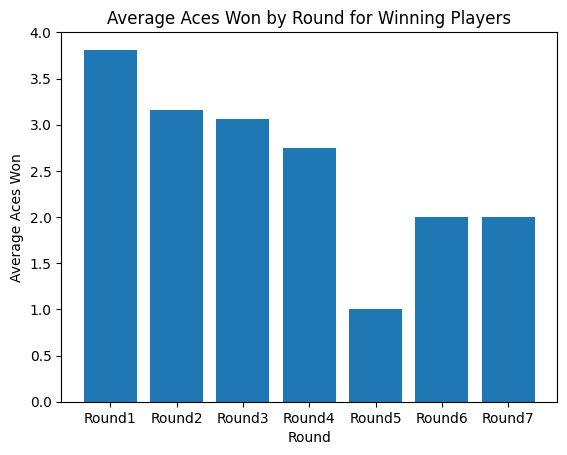

In [ ]:
df=pd.read_csv("/content/AusOpen-women-2013.csv")

l=[]
for i in range(1,8):
  Ri=df[df["Round"]==i]
  winner1=Ri[Ri["Result"]==1]
  n1=winner1["ACE.1"].sum()
  winner2=Ri[Ri["Result"]==0]
  n2=winner2["ACE.2"].sum()
  mean=(n1+n2)/len(Ri)
  l.append(mean)

for i in range(7):
  print(f"Avg ace points scored by winners in {i+1} round is",l[i])
round=["Round1","Round2","Round3","Round4","Round5","Round6","Round7"]
plt.bar(round,l)
plt.title('Average Aces Won by Round for Winning Players')
plt.xlabel('Round')
plt.ylabel('Average Aces Won')
plt.show()





**Q3** From the dataset, FrenchOpen-men-2013, Lists the players who are constantly performing better in each round till round 5. That means the no. of points the player earned increases in each round. Also, plot the line chart for no. of improving players for each round.

<ipython-input-5-a708ecf1345c>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for player in curr_round_rows['Player1'].append(curr_round_rows['Player2']).unique():
<ipython-input-5-a708ecf1345c>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  improving_players_df = improving_players_df.append({'Round': round_num, 'Players': improving_players}, ignore_index=True)
<ipython-input-5-a708ecf1345c>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for player in curr_round_rows['Player1'].append(curr_round_rows['Player2']).unique():
<ipython-input-5-a708ecf1345c>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  improving_players_df = i

  Round                                            Players
0     2  [Julien Benneteau, Roberto Bautista Agut, Jo-W...
1     3  [Gilles Simon, Gael Monfils, Nikolay Davydenko...
2     4  [Gilles Simon, Jo-Wilfried Tsonga, Tommy Robre...
3     5     [Jo-Wilfried Tsonga, Rafael Nadal, Tommy Haas]
4     6  [David Ferrer, Novak Djokovic, Jo-Wilfried Tso...
5     7                                                 []


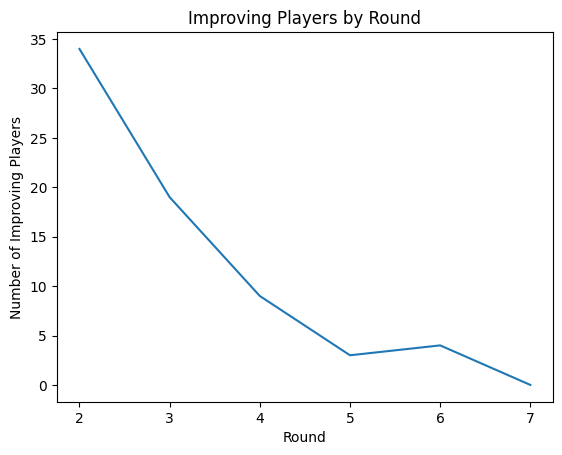

In [ ]:
df = pd.read_csv("/content/FrenchOpen-men-2013.csv")

df.replace('NA', np.nan, inplace=True)

df[['TPW.1', 'TPW.2']] = df[['TPW.1', 'TPW.2']].apply(pd.to_numeric)

improving_players_df = pd.DataFrame(columns=['Round', 'Players'])

for round_num in range(2, 8):
    prev_round_rows = df[df['Round'] == round_num - 1]
    curr_round_rows = df[df['Round'] == round_num]

    improving_players = []

    for player in curr_round_rows['Player1'].append(curr_round_rows['Player2']).unique():
        player_rows = df[(df['Player1'] == player) | (df['Player2'] == player)]

        if player_rows[player_rows['Round'] == round_num - 1].empty:
            continue

        prev_round_tpw = player_rows[player_rows['Round'] == round_num - 1]['TPW.1'].sum() + player_rows[player_rows['Round'] == round_num - 1]['TPW.2'].sum()
        curr_round_tpw = player_rows[player_rows['Round'] == round_num]['TPW.1'].sum() + player_rows[player_rows['Round'] == round_num]['TPW.2'].sum()

        if curr_round_tpw > prev_round_tpw:
            improving_players.append(player)

    improving_players_df = improving_players_df.append({'Round': round_num, 'Players': improving_players}, ignore_index=True)

print(improving_players_df)

import matplotlib.pyplot as plt

improving_players_count = improving_players_df['Players'].apply(len)
plt.plot(range(2, 8, 1), improving_players_count)
plt.xlabel('Round')
plt.ylabel('Number of Improving Players')
plt.title('Improving Players by Round')
plt.show()


**Q4** In the dataset FrenchOpen-women-2013, If a player attempts to net points, it shows that the player is trying to play aggressively. On the other, if a player attempts the least net points, this indicates that she is playing defensively. From the given dataset for each match, the winner finds whether she has an aggressive or defensive style. Also, plot the pie chart for the winner w.r.t aggressive and defensive styles.

            Player1             Player2  Round  Result  FNL.1  FNL.2  FSP.1  \
0      Su-Wei Hsieh     Maria Sharapova      1       0      0      2     62   
1  Eugenie Bouchard  Tsvetana Pironkova      1       1      2      0     57   
2         Jie Zheng        Vesna Dolonc      1       1      2      0     76   
3     Tamira Paszek       Melanie Oudin      1       0      0      2     59   
4       Karin Knapp     Sloane Stephens      1       0      0      2     57   

   FSW.1  SSP.1  SSW.1  ...  NPW.2  TPW.2  ST1.2  ST2.2  ST3.2  ST4.2  ST5.2  \
0     18     38      5  ...      5     57      6    6.0    NaN    NaN    NaN   
1     23     43     17  ...      8     48      1    6.0    NaN    NaN    NaN   
2     30     24      5  ...     20     56      4    1.0    NaN    NaN    NaN   
3     16     41      8  ...      8     78      6    6.0    NaN    NaN    NaN   
4     18     43     13  ...      4     61      6    7.0    NaN    NaN    NaN   

   NPA_Winner  NPA_Loser  Winner_Style  
0  

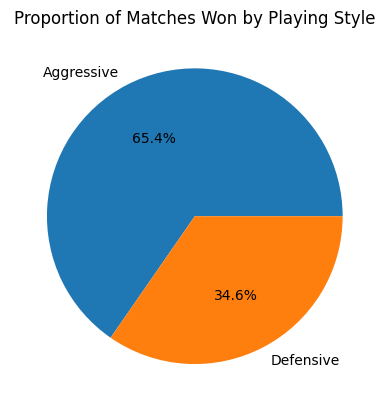

In [ ]:
df=pd.read_csv("/content/FrenchOpen-women-2013.csv")

df['NPA_Winner'] = df['NPA.1']
df.loc[df["FNL.1"] < df['FNL.2'], 'NPA_Winner'] = df['NPA.2']

df['NPA_Loser'] = df['NPA.2']
df.loc[df['FNL.1'] < df['FNL.2'], 'NPA_Loser'] = df['NPA.1']

df['Winner_Style'] = np.where(df['NPA_Winner'] >= df['NPA_Loser'], 'Aggressive', 'Defensive')

print(df.head())

winner_style_count = df.groupby('Winner_Style').size()
plt.pie(winner_style_count, labels=winner_style_count.index, autopct='%1.1f%%')
plt.title('Proportion of Matches Won by Playing Style')
plt.show()


**Q5** In the dataset USOpen-men-2013, what is the probability that a player wins the match if he does not commit double faults? Also, find the probability that if a player commits less double faults than his opponent and he wins the match.

In [ ]:

df = pd.read_csv('/content/USOpen-men-2013.csv')

no_df_count = len(df[(df['DBF.1'] == 0) | (df['DBF.2'] == 0)])

no_df_win_count = len(df[(df['DBF.1'] == 0) & (df['FNL1'] > df['FNL2']) | (df['DBF.2'] == 0) & (df['FNL2'] > df['FNL1'])])

if no_df_count == 0:
    print('There are no matches where either player did not commit any double faults.')
else:
    prob_no_df_win = no_df_win_count / no_df_count
    print(f'The probability of winning the match with no double faults is {prob_no_df_win:.2f}')

less_df_win_count = len(df[(df['DBF.1'] < df['DBF.2']) & (df['FNL1'] > df['FNL2']) | (df['DBF.2'] < df['DBF.1']) & (df['FNL2'] > df['FNL1'])])

total_match_count = len(df)

prob_less_df_win = less_df_win_count / total_match_count
print(f'The probability of winning the match with fewer double faults is {prob_less_df_win:.2f}')


The probability of winning the match with no double faults is 0.75
The probability of winning the match with fewer double faults is 0.66


**Q6** In dataset USOpen-women-2013, if we choose a player randomly for any match, then what is the probability that the Player won the match when their first serve won percentage is greater than 50%?

In [ ]:
df = pd.read_csv('/content/USOpen-women-2013.csv')

high_fs_win_count = len(df[(df['FSW.1'] > 40) & (df['FNL.1'] > df['FNL.2']) | (df['FSW.2'] > 40) & (df['FNL.2'] > df['FNL.1'])])

total_match_count = len(df)

prob_high_fs_win = 0
high_fs_matches = df.loc[(df['FSW.1'] > 40) | (df['FSW.2'] > 40)]
if len(high_fs_matches) > 0:
    prob_high_fs_win = high_fs_win_count / len(high_fs_matches)
    print(f'The probability of winning the match with a first serve won percentage greater than 40% is {prob_high_fs_win:.2f}')
else:
    print('No matches found with a first serve won percentage greater than 40%')


The probability of winning the match with a first serve won percentage greater than 40% is 0.94


**Q7** In the dataset, Wimbledon-men-2013 find the top 4 players, i.e. players who qualify for round 6. Compare Avg first serve won, Avg net points won, Avg ace points won, and Avg break points won using a bar graph.

Avg first serve % of top 4 players are

J.Janowicz 61.0
N.Djokovic 49.714285714285715
A.Murray 51.714285714285715
J.Del Potro 55.0


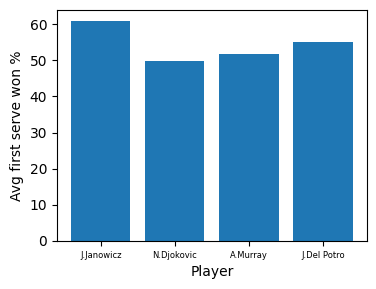



Avg net points won by top 4 players

J.Janowicz 30.0
N.Djokovic 21.428571428571427
A.Murray 22.428571428571427
J.Del Potro 13.166666666666666


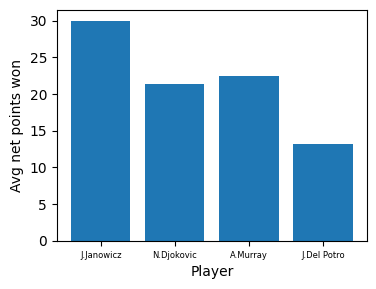



Avg ace points won by top 4 players

J.Janowicz 12.5
N.Djokovic 11.428571428571429
A.Murray 12.714285714285714
J.Del Potro 9.666666666666666


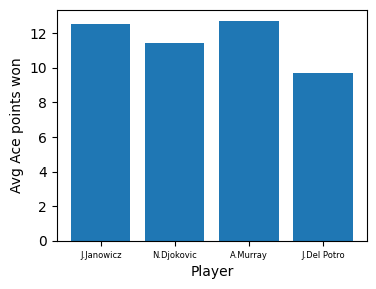



Avg break points won by top 4 players

J.Janowicz 2.0
N.Djokovic 4.142857142857143
A.Murray 5.142857142857143
J.Del Potro 3.5


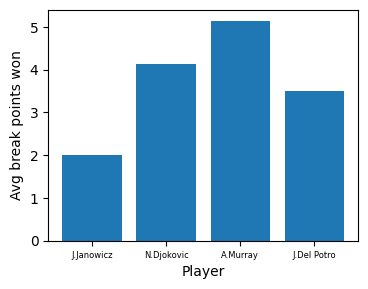

In [ ]:

df = pd.read_csv('/content/Wimbledon-men-2013.csv')

R6=df[df["Round"]==6]

print("Avg first serve % of top 4 players are\n")
new1_df=df.groupby("Player1")["FSW.1"].mean()
new2_df=df.groupby("Player2")["FSW.2"].mean()
l11=[];l12=[]
for i in R6["Player1"]:
  if i in new1_df.index:
    print(i,new1_df[i])
    l11.append(i);l12.append(new1_df[i])
for i in R6["Player2"]:
  if i in new2_df.index:
    print(i,new2_df[i])
    l11.append(i);l12.append(new2_df[i])
plt.figure(figsize=(4,3))
plt.bar(l11,l12)
plt.xticks(fontsize=6)
plt.xlabel('Player')
plt.ylabel('Avg first serve won %')
plt.show()


print("\n\nAvg net points won by top 4 players\n")
net1_df=df.groupby("Player1")["NPW.1"].mean()
net2_df=df.groupby("Player2")["NPW.2"].mean()
l21=[];l22=[]
for i in R6["Player1"]:
  if i in net1_df.index:
    print(i,net1_df[i])
    l21.append(i);l22.append(net1_df[i])
for i in R6["Player2"]:
  if i in net2_df.index:
    print(i,net2_df[i])
    l21.append(i);l22.append(net2_df[i])
plt.figure(figsize=(4,3))
plt.bar(l21,l22)
plt.xticks(fontsize=6)
plt.xlabel('Player')
plt.ylabel('Avg net points won')
plt.show()


print("\n\nAvg ace points won by top 4 players\n")
ace1_df=df.groupby("Player1")["ACE.1"].mean()
ace2_df=df.groupby("Player2")["ACE.2"].mean()
l31=[];l32=[]
for i in R6["Player1"]:
  if i in ace1_df.index:
    print(i,ace1_df[i])
    l31.append(i);l32.append(ace1_df[i])
for i in R6["Player2"]:
  if i in ace2_df.index:
    print(i,ace2_df[i])
    l31.append(i);l32.append(ace2_df[i])
plt.figure(figsize=(4,3))
plt.bar(l31,l32)
plt.xticks(fontsize=6)
plt.xlabel('Player')
plt.ylabel('Avg Ace points won')
plt.show()


print("\n\nAvg break points won by top 4 players\n")
break1_df=df.groupby("Player1")["BPW.1"].mean()
break2_df=df.groupby("Player2")["BPW.2"].mean()
l41=[];l42=[]
for i in R6["Player1"]:
  if i in break1_df.index:
    print(i,break1_df[i])
    l41.append(i);l42.append(break1_df[i])
for i in R6["Player2"]:
  if i in break2_df.index:
    print(i,break2_df[i])
    l41.append(i);l42.append(break2_df[i])
plt.figure(figsize=(4,3))
plt.bar(l41,l42)
plt.xticks(fontsize=6)
plt.xlabel('Player')
plt.ylabel('Avg break points won')
plt.show()






**Q8** An unforced error committed by any player may affect the result of the match. At a higher level of competition, there is less chance for any mistake. Find the avg unforced error done by players in each round. Also, plot the graph for round vs avg unforced error. (dataset Wimbledon-women-2013)

At time= 0.0 s Depth= 0.0 m
At time= 0.5 s Depth= -0.1875 m
At time= 1.0 s Depth= -0.19619 m
At time= 1.5 s Depth= 0.09564 m
At time= 2.0 s Depth= 0.51208 m
At time= 2.5 s Depth= 0.74533 m
At time= 3.0 s Depth= 0.64194 m
At time= 3.5 s Depth= 0.34652 m
At time= 4.0 s Depth= 0.17095 m
At time= 4.5 s Depth= 0.30937 m
At time= 5.0 s Depth= 0.66109 m
At time= 5.5 s Depth= 0.92435 m
At time= 6.0 s Depth= 0.87465 m
At time= 6.5 s Depth= 0.57195 m
At time= 7.0 s Depth= 0.30613 m
At time= 7.5 s Depth= 0.331 m
At time= 8.0 s Depth= 0.63134 m
At time= 8.5 s Depth= 0.93723 m
At time= 9.0 s Depth= 0.97249 m
At time= 9.5 s Depth= 0.7088 m
At time= 10.0 s Depth= 0.39193 m


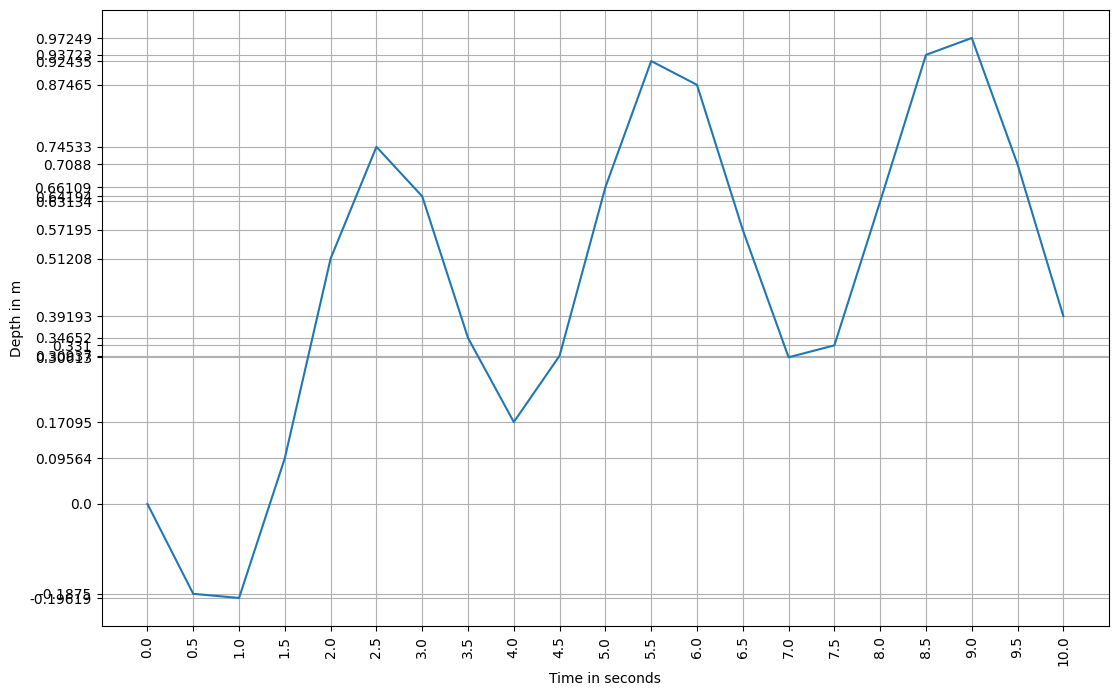

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
i=0.0
#variable represents time
Q=500
#flow per unit time
al=300
#value of alpha
A=1200
#Area of the base
a=[0.0]
#list for storing values of height at particular time
t=[i]
#list for storing time values with stepsize of 0.5
s=1
#counter for height list
while (i<10):
  #loop created to keep the track that time donot go beyond 10 and stepsize is 0.5
  a.append(round((((3*Q*(-np.cos(2*i)+1)/2/A)-(al*(1+a[s-1])*1.5/(A*1)))*0.5+a[s-1]),5))
  #new value of height ia appended in the list at new time
  i+=0.5
  t.append(i)
  #similarly new value of time is also added in the list
  s+=1
for j in range (len(a)):
  print ("At time=",t[j],"s","Depth=",a[j],"m")
  #printing depth values wrt particular time

plt.figure(figsize=(13,8))
plt.grid()
plt.xticks(ticks=t, labels=t, rotation =90)
plt.yticks(ticks=a, labels=a)
plt.xlabel("Time in seconds")
plt.ylabel("Depth in m")
plt.plot(t,a)
plt.show()
#plotting a graph with time on x-axis and depth on y-axis

In [ ]:
a=input("enter a num")
b=int(a)
print(5*b)

enter a num5
25


Round
1    22.234375
2    19.092593
3    17.437500
4    18.500000
5    20.500000
6    18.000000
7    19.500000
dtype: float64


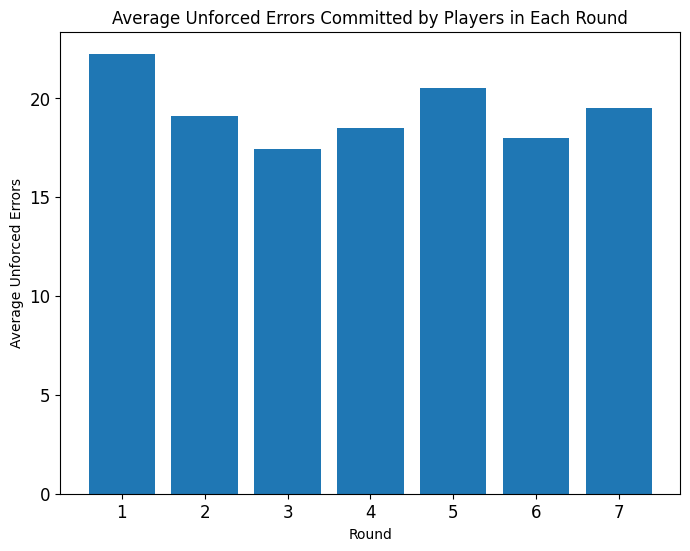

In [ ]:
df = pd.read_csv('/content/Wimbledon-women-2013.csv')

ufe1_df = df.groupby('Round')['UFE.1'].mean()
ufe2_df = df.groupby('Round')['UFE.2'].mean()

ufe_combined = (ufe1_df + ufe2_df) / 2
print(ufe_combined)

plt.figure(figsize=(8, 6))
plt.bar(ufe_combined.index, ufe_combined.values)
plt.title('Average Unforced Errors Committed by Players in Each Round')
plt.xlabel('Round')
plt.ylabel('Average Unforced Errors')
plt.xticks(fontsize=10)
plt.tick_params(axis='both', labelsize=12)
plt.show()

